In [1]:
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import time

In [2]:
def read_mnist(mnist_file):
    """
    Reads MNIST data.
    
    Parameters
    ----------
    mnist_file : string
        The name of the MNIST file (e.g., 'mnist.pkl.gz').
    
    Returns
    -------
    (train_X, train_Y, val_X, val_Y, test_X, test_Y) : tuple
        train_X : numpy array, shape (N=50000, d=784)
            Input vectors of the training set.
        train_Y: numpy array, shape (N=50000)
            Outputs of the training set.
        val_X : numpy array, shape (N=10000, d=784)
            Input vectors of the validation set.
        val_Y: numpy array, shape (N=10000)
            Outputs of the validation set.
        test_X : numpy array, shape (N=10000, d=784)
            Input vectors of the test set.
        test_Y: numpy array, shape (N=10000)
            Outputs of the test set.
    """
    f = gzip.open(mnist_file, 'rb')
    train_data, val_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    
    train_X, train_Y = train_data
    val_X, val_Y = val_data
    test_X, test_Y = test_data    
    
    return train_X, train_Y, val_X, val_Y, test_X, test_Y

**Linear Kernel**

In [3]:
def run_model(clf,train_X,train_Y,val_X,val_Y):
    #save error on training, validation set, time for training
    #use binary error

    #train processing
    print("time train processing")
    first_time = time.time()
    clf.fit(train_X,train_Y)
    time_train = time.time()-first_time

    #error on train set
    print("train err processing")
    train_pred = clf.predict(train_X)
    train_err =np.mean(train_pred != train_Y)
    #error on validation set
    print("validation err")
    val_pred = clf.predict(val_X)
    val_err = np.mean(val_pred != val_Y)
    print("return")
    return time_train, train_err, val_err

        

In [4]:
def plot_rbf_kernel(C,gamma,err_train,err_val):
    plt.plot(C, err_val.reshape(-1,1))
    plt.plot(C, err_train.reshape(-1,1))
    plt.xlabel('C')
    plt.ylabel('Error')
    plt.title('Gamma='+str(gamma))
    plt.ylim([0, 0.4])
    plt.legend(['validation error', 'train error'], loc='upper left')

In [ ]:
def plot_linear_kernel(C,err_train,err_val):
    plt.plot(C, err_val.reshape(-1,1))
    plt.plot(C, err_train.reshape(-1,1))
    plt.xlabel('C')
    plt.ylabel('Error')
    plt.ylim([0, 0.4])
    plt.legend(['validation error', 'train error'], loc='upper left')

In [ ]:
def SVM(train_X,train_Y,val_X,val_Y):
    list_kernel = ['linear','rbf']
    list_C = [0.1,   1,    10,  100, 200]
    gamma  = [0.001, 0.005, 0.01, 0.05, 0.1]
    
    err_train_linear = np.zeros(5)
    err_val_linear = np.zeros(5)
    
    err_train_rbf = np.zeros((5,5))
    err_val_rbf = np.zeros((5,5))

    for k in list_kernel:
        if (k == "linear"):

            for c in range(len(list_C)):
                #set up linear kernel
                print("\nset up model processing with C = ",list_C[c],",kernel = ",k)
                clf = SVC(kernel = k, C = list_C[c])
                #processing
                print("running and saving")
                time_train, train_err, val_err = run_model(clf,train_X,train_Y,val_X,val_Y)
                #save in error array
                err_train_linear[c] = train_err
                err_val_linear[c]   = val_err

                #output
                print("***********")
                print("\t\ttime for training: ",time_train)
                print("\t\terror on train set: ",train_err)
                print("\t\terror on validation set: ",val_err)
                print("***********")
            
            print("Plotting...")
            plot_linear_kernel(list_C, err_train_linear, err_val_linear)
            plt.show()
            
        else:
            for gam in range(len(gamma)):
                for c in range(len(list_C)):
                    #set up rbf kernel
                    print("\nset up model processing with C = ",list_C[c],", gamma = ",gamma[gam],", kernel = ",k)
                    clf = SVC(kernel = k, gamma = gamma[gam], C = list_C[c])
                    #processing
                    print("running and saving")
                    time_train, train_err, val_err = run_model(clf,train_X,train_Y,val_X,val_Y)
                    #save in error array
                    err_train_rbf[gam][c] = train_err
                    err_val_rbf[gam][c]   = val_err
                    
                    #output
                    print("***********")
                    print("\t\ttime for training: ",time_train)
                    print("\t\terror on train set: ",train_err)
                    print("\t\terror on validation set: ",val_err)
                    print("***********")
                
                print("Plotting...")
                plot_rbf_kernel(list_C, gamma[gam], err_train_rbf[gam], err_val_rbf[gam])
                plt.show()


set up model processing with C =  0.1 ,kernel =  linear
running and saving
time train processing
train err processing
validation err
return
***********
		time for training:  240.99784517288208
		error on train set:  0.04188
		error on validation set:  0.0519
***********

set up model processing with C =  1 ,kernel =  linear
running and saving
time train processing
train err processing
validation err
return
***********
		time for training:  293.4257893562317
		error on train set:  0.02754
		error on validation set:  0.0577
***********

set up model processing with C =  10 ,kernel =  linear
running and saving
time train processing
train err processing
validation err
return
***********
		time for training:  422.5537278652191
		error on train set:  0.01692
		error on validation set:  0.0716
***********

set up model processing with C =  100 ,kernel =  linear
running and saving
time train processing
train err processing
validation err
return
***********
		time for training:  1211.988990068

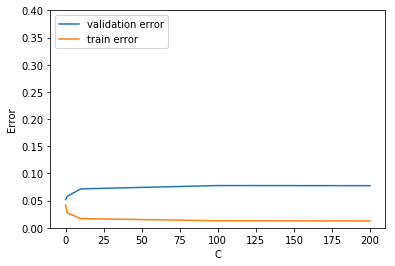


set up model processing with C =  0.1 , gamma =  0.001 , kernel =  rbf
running and saving
time train processing
train err processing
validation err
return
***********
		time for training:  1392.8488199710846
		error on train set:  0.09824
		error on validation set:  0.0861
***********

set up model processing with C =  1 , gamma =  0.001 , kernel =  rbf
running and saving
time train processing
train err processing
validation err
return
***********
		time for training:  540.7072677612305
		error on train set:  0.06422
		error on validation set:  0.0589
***********

set up model processing with C =  10 , gamma =  0.001 , kernel =  rbf
running and saving
time train processing
train err processing
validation err
return
***********
		time for training:  277.63647389411926
		error on train set:  0.03794
		error on validation set:  0.0408
***********

set up model processing with C =  100 , gamma =  0.001 , kernel =  rbf
running and saving
time train processing
train err processing
validatio

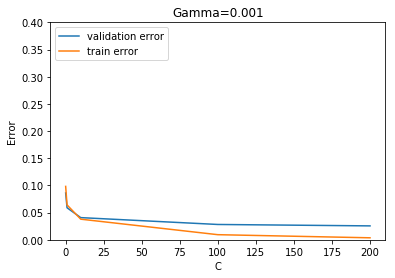


set up model processing with C =  0.1 , gamma =  0.005 , kernel =  rbf
running and saving
time train processing
train err processing
validation err
return
***********
		time for training:  1279.142465353012
		error on train set:  0.0632
		error on validation set:  0.0561
***********

set up model processing with C =  1 , gamma =  0.005 , kernel =  rbf
running and saving
time train processing
train err processing
validation err
return
***********
		time for training:  467.92258048057556
		error on train set:  0.02946
		error on validation set:  0.0318
***********

set up model processing with C =  10 , gamma =  0.005 , kernel =  rbf
running and saving
time train processing
train err processing
validation err
return
***********
		time for training:  298.97368597984314
		error on train set:  0.00444
		error on validation set:  0.0197
***********

set up model processing with C =  100 , gamma =  0.005 , kernel =  rbf
running and saving
time train processing
train err processing
validation

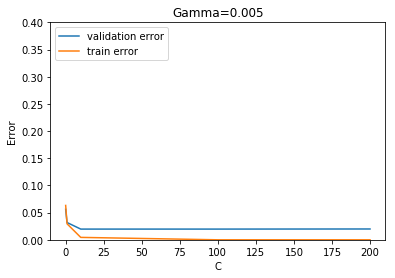


set up model processing with C =  0.1 , gamma =  0.01 , kernel =  rbf
running and saving
time train processing
train err processing
validation err
return
***********
		time for training:  895.8118131160736
		error on train set:  0.04702
		error on validation set:  0.0422
***********

set up model processing with C =  1 , gamma =  0.01 , kernel =  rbf
running and saving
time train processing
train err processing
validation err
return
***********
		time for training:  373.0406813621521
		error on train set:  0.01526
		error on validation set:  0.0223
***********

set up model processing with C =  10 , gamma =  0.01 , kernel =  rbf
running and saving
time train processing
train err processing
validation err
return
***********
		time for training:  292.33511114120483
		error on train set:  0.00058
		error on validation set:  0.0165
***********

set up model processing with C =  100 , gamma =  0.01 , kernel =  rbf
running and saving
time train processing
train err processing
validation err

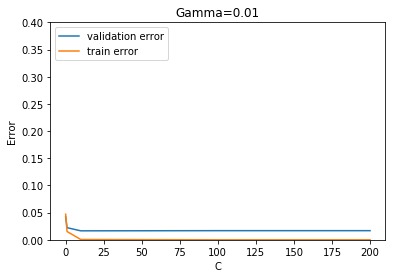


set up model processing with C =  0.1 , gamma =  0.05 , kernel =  rbf
running and saving
time train processing
train err processing
validation err
return
***********
		time for training:  2249.269859790802
		error on train set:  0.03188
		error on validation set:  0.0347
***********

set up model processing with C =  1 , gamma =  0.05 , kernel =  rbf
running and saving
time train processing
train err processing
validation err
return
***********
		time for training:  1419.1279647350311
		error on train set:  0.00084
		error on validation set:  0.0179
***********

set up model processing with C =  10 , gamma =  0.05 , kernel =  rbf
running and saving
time train processing
train err processing
validation err
return
***********
		time for training:  1244.4181535243988
		error on train set:  0.0
		error on validation set:  0.0167
***********

set up model processing with C =  100 , gamma =  0.05 , kernel =  rbf
running and saving
time train processing
train err processing
validation err
re

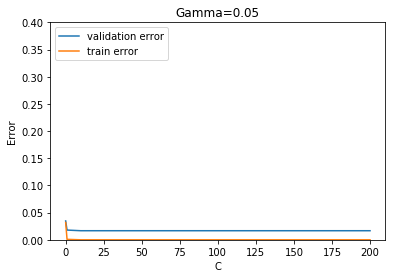


set up model processing with C =  0.1 , gamma =  0.1 , kernel =  rbf
running and saving
time train processing
train err processing
validation err
return
***********
		time for training:  4376.389805555344
		error on train set:  0.28952
		error on validation set:  0.3125
***********

set up model processing with C =  1 , gamma =  0.1 , kernel =  rbf
running and saving
time train processing


In [ ]:
# main function
def main():
    #read data
    train_X, train_Y, val_X, val_Y, test_X, test_Y = read_mnist('mnist.pkl.gz')
    SVM(train_X,train_Y,val_X,val_Y)
    
if __name__== "__main__":
    main()